In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Electron

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [5]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dEscaleDown', 'dEscaleUp', 'dEsigmaDown', 'dEsigmaUp', 'deltaEtaSC', 'dr03EcalRecHitSumEt', 'dr03HcalDepth1TowerSumEt', 'dr03TkSumPt', 'dr03TkSumPtHEEP', 'dxy', 'dxyErr', 'dz', 'dzErr', 'eCorr', 'eInvMinusPInv', 'energyErr', 'eta', 'hoe', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'mvaFall17V2Iso', 'mvaFall17V2noIso', 'pfRelIso03_all', 'pfRelIso03_chg', 'phi', 'pt', 'r9', 'scEtOverPt', 'sieie', 'sip3d', 'mvaTTH', 'charge', 'cutBased', 'jetIdx', 'pdgId', 'photonIdx', 'tightCharge', 'vidNestedWPBitmap', 'vidNestedWPBitmapHEEP', 'convVeto', 'cutBased_HEEP', 'isPFcand', 'jetNDauCharged', 'lostHits', 'mvaFall17V2Iso_WP80', 'mvaFall17V2Iso_WP90', 'mvaFall17V2Iso_WPL', 'mvaFall17V2noIso_WP80', 'mvaFall17V2noIso_WP90', 'mvaFall17V2noIso_WPL', 'seedGain', 'genPartIdx', 'genPartFlav', 'cleanmask', 'genPartIdxG', 'jetIdxG', 'photonIdxG']


# Basic Information
## We want basic 4 vector or related variables

## eta

4mu eta structure: [[], [], [], [], [], [], [], [], [], ... [-0.51], [], [], [], [], [], [], [2.35]]
2mu2e eta structure: [[-0.31, -0.276], [-1.66, -1.72], [-0.0475], ... [0.495, 0.456], [0.494], [-0.884]]
4mu eta structure: [[2.3], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e eta structure: [[1.4, 1.36], [-0.0938, -0.0121], [-0.411, ... [0.477], [-1.09, -1.07, -0.469]]
4mu eta structure: [[], [], [], [], [], [], [], [1.25], [], ... [], [], [], [], [], [], [], [], [-1.42]]
2mu2e eta structure: [[], [0.505], [-1.75], [], [-0.881, -1.23], ... [0.423], [], [-0.981], [], [-1.17]]
4mu eta structure: [[], [], [], [], [], [], [], [], [], [], ... [], [-0.17], [], [], [], [], [], [], []]
2mu2e eta structure: [[2.49], [], [2.06], [], [], [], [], ... [-2.13], [], [], [-1.03], [], [1.84]]
4mu eta structure: [[], [], [], [2.31], [], [], [], [], [], ... [], [], [], [0.981], [], [], [], [], []]
2mu2e eta structure: [[], [], [], [], [], [], [], [-1.88], ... [], [-0.000

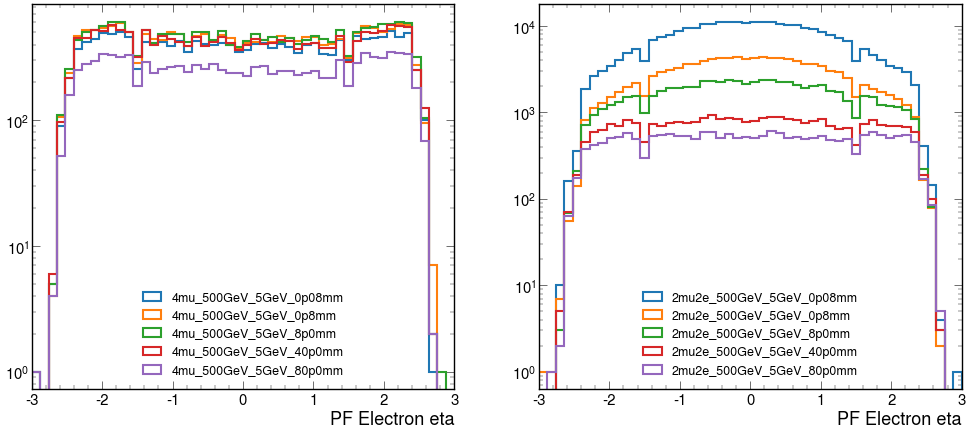

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("eta", events_4mu[i_4mu].eta, events_2mu2e[i_2mu].eta)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].eta), range=(-3,3), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-3,3)
ax[1].set_xlim(-3,3)
ax[0].set_xlabel('PF Electron eta')
ax[1].set_xlabel('PF Electron eta')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/eta.png", bbox_inches="tight")

## mass

4mu mass structure: [[], [], [], [], [], [], [], [], [], ... 0.00218], [], [], [], [], [], [], [0.00308]]
2mu2e mass structure: [[-0.0152, 0.00767], [-0.0751, 0.0363], ... -0.0483, 0.0291], [-0.03], [0.0209]]
4mu mass structure: [[-0.00186], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e mass structure: [[0.101, 0.0324], [-0.0474, 0.00417], ... [-0.0806], [-0.045, -0.0135, -0.00179]]
4mu mass structure: [[], [], [], [], [], [], [], [-0.00293], ... [], [], [], [], [], [], [], [-0.00135]]
2mu2e mass structure: [[], [0.00356], [-0.181], [], [0.049, ... -0.00607], [], [-0.00229], [], [-0.00288]]
4mu mass structure: [[], [], [], [], [], [], [], [], [], ... [0.00158], [], [], [], [], [], [], []]
2mu2e mass structure: [[0.0214], [], [0.00561], [], [], [], ... -0.00238], [], [], [-0.0501], [], [-0.102]]
4mu mass structure: [[], [], [], [-0.0105], [], [], [], [], ... [], [], [-0.0266], [], [], [], [], []]
2mu2e mass structure: [[], [], [], [], [], [], [], [0.00432

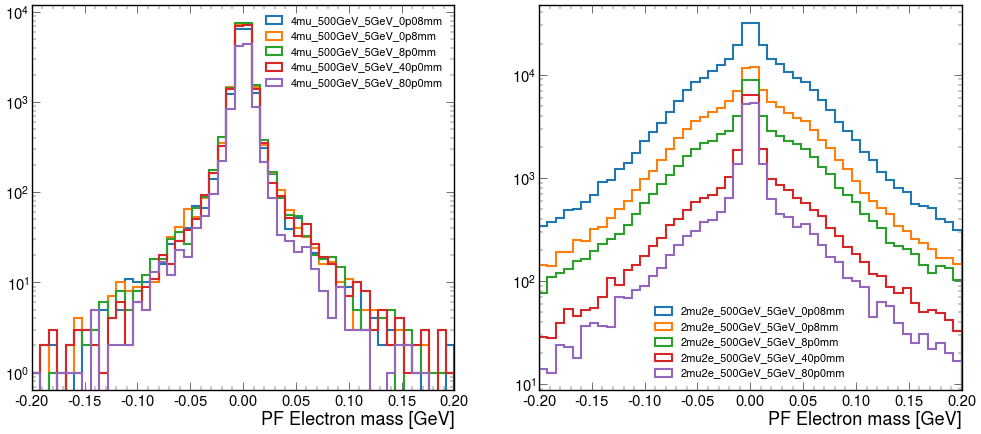

In [5]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("mass", events_4mu[i_4mu].mass, events_2mu2e[i_2mu].mass)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].mass), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].mass), range=(-0.2,0.2), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.2,0.2)
ax[1].set_xlim(-0.2,0.2)
ax[0].set_xlabel('PF Electron mass [GeV]')
ax[1].set_xlabel('PF Electron mass [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/mass.png", bbox_inches="tight")

## phi

4mu phi structure: [[], [], [], [], [], [], [], [], [], ... [2.33], [], [], [], [], [], [], [-2.65]]
2mu2e phi structure: [[-0.994, -1.06], [-0.481, -0.451], [-2.43], ... [-0.225, -0.243], [-2.25], [0.927]]
4mu phi structure: [[-0.426], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e phi structure: [[-1.97, -2], [-2.88, -2.88], [1.52, ... -2.31], [2.88], [-0.795, -0.888, 0.966]]
4mu phi structure: [[], [], [], [], [], [], [], [-0.343], ... [], [], [], [], [], [], [], [-0.826]]
2mu2e phi structure: [[], [-1.56], [-0.602], [], [-2.91, -1.54], ... [-2.26], [], [1.85], [], [-1.18]]
4mu phi structure: [[], [], [], [], [], [], [], [], [], [], ... [], [3.05], [], [], [], [], [], [], []]
2mu2e phi structure: [[2.64], [], [-2.04], [], [], [], [], ... [-0.181], [], [], [-2.32], [], [0.417]]
4mu phi structure: [[], [], [], [0.594], [], [], [], [], [], ... [], [], [], [2.18], [], [], [], [], []]
2mu2e phi structure: [[], [], [], [], [], [], [], [0.895], ... [], [1.85]

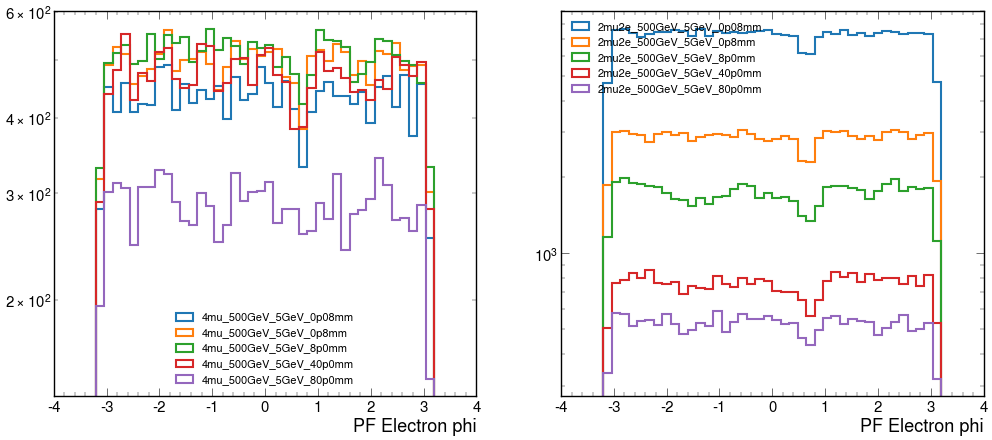

In [6]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("phi", events_4mu[i_4mu].phi, events_2mu2e[i_2mu].phi)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].phi), range=(-4,4), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-4,4)
ax[1].set_xlim(-4,4)
ax[0].set_xlabel('PF Electron phi')
ax[1].set_xlabel('PF Electron phi')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/phi.png", bbox_inches="tight")

## pt

4mu pt structure: [[], [], [], [], [], [], [], [], [], ... [7.9], [], [], [], [], [], [], [8.26]]
2mu2e pt structure: [[91, 90.3], [175, 40.6], [302], [245], ... [150, 109], [181, 137], [238], [232]]
4mu pt structure: [[5.73], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e pt structure: [[146, 66.2], [180, 19], [236, 11], [131, ... 20.9], [178], [249], [113, 22.2, 5.17]]
4mu pt structure: [[], [], [], [], [], [], [], [20.9], [], ... [], [], [], [], [], [], [], [], [7.23]]
2mu2e pt structure: [[], [15.3], [199], [], [355, 21.4], [], ... [], [70.1], [], [7.78], [], [12.8]]
4mu pt structure: [[], [], [], [], [], [], [], [], [], [], ... [], [5.29], [], [], [], [], [], [], []]
2mu2e pt structure: [[14.7], [], [5.38], [], [], [], [], [], ... [221], [10.7], [], [], [196], [], [122]]
4mu pt structure: [[], [], [], [6.74], [], [], [], [], [], ... [], [], [], [64.8], [], [], [], [], []]
2mu2e pt structure: [[], [], [], [], [], [], [], [7.54], ... 5.27], [], [232], 

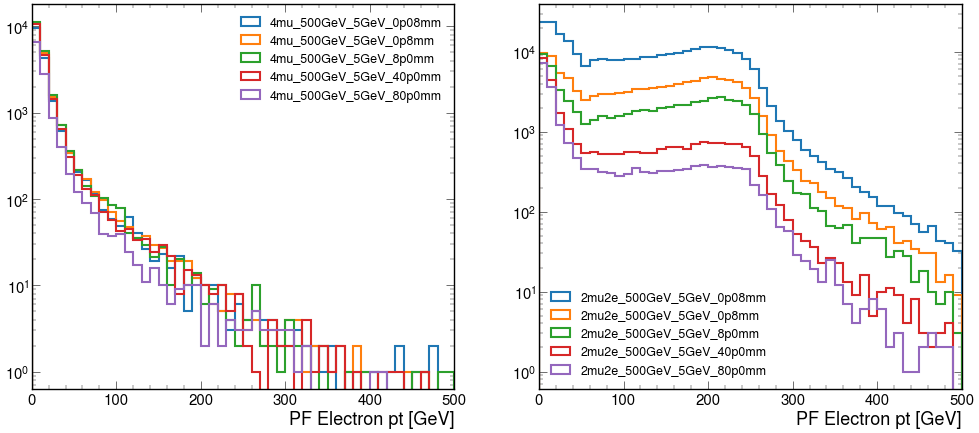

In [10]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt", events_4mu[i_4mu].pt, events_2mu2e[i_2mu].pt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt), range=(0,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt), range=(0,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)
ax[0].set_xlabel('PF Electron pt [GeV]')
ax[1].set_xlabel('PF Electron pt [GeV]')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/pt.png", bbox_inches="tight")

## deltaEtaSC

4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [], ... -0.00401], [], [], [], [], [], [], [0.00456]]
2mu2e deltaEtaSC structure: [[0.0184, 0.0166], [0.00274, 0.00323], ... 0.0233, 0.0247], [-0.0166], [0.018]]
4mu deltaEtaSC structure: [[-0.0114], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e deltaEtaSC structure: [[0.0122, 0.0129], [0.0058, 0.00385], ... [0.0262], [-0.015, -0.0138, -0.0119]]
4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [0.0155], ... [], [], [], [], [], [], [], [0.000891]]
2mu2e deltaEtaSC structure: [[], [0.0106], [0.00209], [], [-0.00625, ... -0.0428], [], [-0.00813], [], [-0.0145]]
4mu deltaEtaSC structure: [[], [], [], [], [], [], [], [], [], ... [], [0.0207], [], [], [], [], [], [], []]
2mu2e deltaEtaSC structure: [[0.00179], [], [0.00717], [], [], [], ... [], [], [0.00748], [], [-0.000349]]
4mu deltaEtaSC structure: [[], [], [], [0.0683], [], [], [], [], ... [], [], [0.019], [], [], [], [], []]
2mu2e deltaEtaSC str

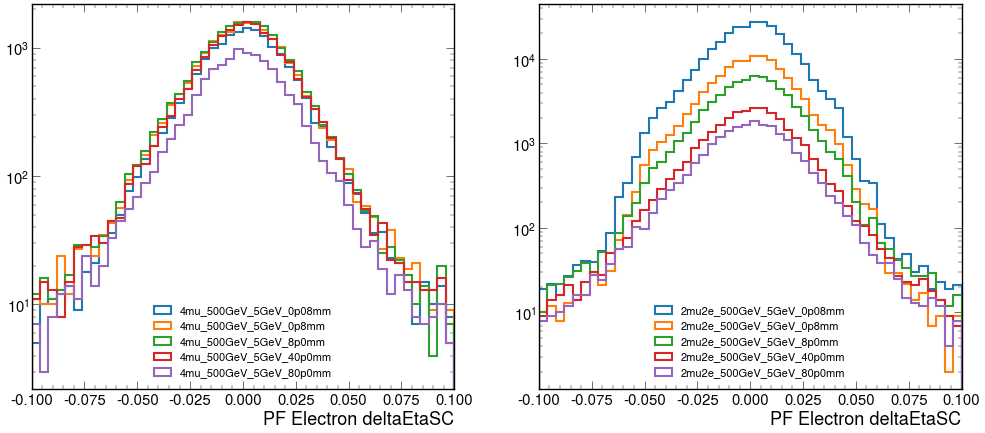

In [8]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("deltaEtaSC", events_4mu[i_4mu].deltaEtaSC, events_2mu2e[i_2mu].deltaEtaSC)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].deltaEtaSC), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].deltaEtaSC), range=(-0.1,0.1), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(-0.1,0.1)
ax[1].set_xlim(-0.1,0.1)
ax[0].set_xlabel('PF Electron deltaEtaSC')
ax[1].set_xlabel('PF Electron deltaEtaSC')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/deltaEtaSC.png", bbox_inches="tight")

## jetPtRelv2

4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [], [], ... [1.04], [], [], [], [], [], [], [2.13]]
2mu2e jetPtRelv2 structure: [[5.38, 4.42], [7.42, 2.85], [238], [46.4, ... 4.31], [7.73, 4.67], [202], [27.8]]
4mu jetPtRelv2 structure: [[0], [], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], [], []]
2mu2e jetPtRelv2 structure: [[6.02, 3.11], [16.6, 1.56], [10.7, 1.07], ... [7.95], [11.9], [11.5, 2.09, 0.399]]
4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [4.61], [], ... [], [], [], [], [], [], [], [], [0.514]]
2mu2e jetPtRelv2 structure: [[], [1.24], [16.7], [], [20.8, 1.89], [], ... [], [2.65], [], [1.15], [], [0.313]]
4mu jetPtRelv2 structure: [[], [], [], [], [], [], [], [], [], [], ... [], [0], [], [], [], [], [], [], []]
2mu2e jetPtRelv2 structure: [[1.62], [], [0.926], [], [], [], [], ... [0.998], [], [], [9.56], [], [6.69]]
4mu jetPtRelv2 structure: [[], [], [], [1.96], [], [], [], [], [], ... [], [], [], [12], [], [], [], [], []]
2mu2e jetP

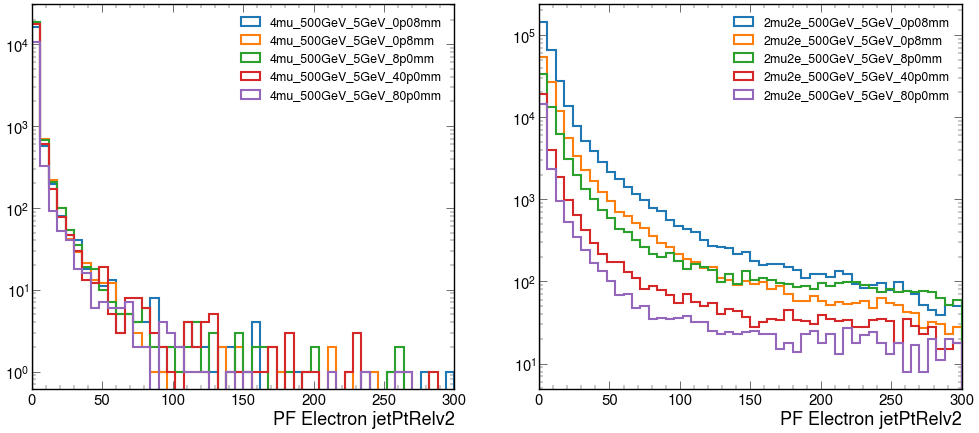

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("jetPtRelv2", events_4mu[i_4mu].jetPtRelv2, events_2mu2e[i_2mu].jetPtRelv2)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].jetPtRelv2), range=(0,300), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].jetPtRelv2), range=(0,300), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,300)
ax[1].set_xlim(0,300)
ax[0].set_xlabel('PF Electron jetPtRelv2')
ax[1].set_xlabel('PF Electron jetPtRelv2')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/jetPtRelv2.png", bbox_inches="tight")

## sieie

4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [0.0116], [], [], [], [], [], [], [0.035]]
2mu2e sieie structure: [[0.0174, 0.016], [0.0507, 0.0468], ... 0.0167, 0.0204], [0.0089], [0.00925]]
4mu sieie structure: [[0.0453], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0166, 0.0174], [0.00924, 0.017], ... [0.00842], [0.00896, 0.0104, 0.0185]]
4mu sieie structure: [[], [], [], [], [], [], [], [0.0123], ... [], [], [], [], [], [], [], [0.0097]]
2mu2e sieie structure: [[], [0.0132], [0.0224], [], [0.0091, ... 0.0213], [], [0.0115], [], [0.0176]]
4mu sieie structure: [[], [], [], [], [], [], [], [], [], ... [], [0.0105], [], [], [], [], [], [], []]
2mu2e sieie structure: [[0.0456], [], [0.0512], [], [], [], ... [0.0304], [], [], [0.0153], [], [0.0254]]
4mu sieie structure: [[], [], [], [0.0207], [], [], [], [], ... [], [], [0.0131], [], [], [], [], []]
2mu2e sieie structure: [[], [], [], [], [], [], [], [0.0464], ... [], [0

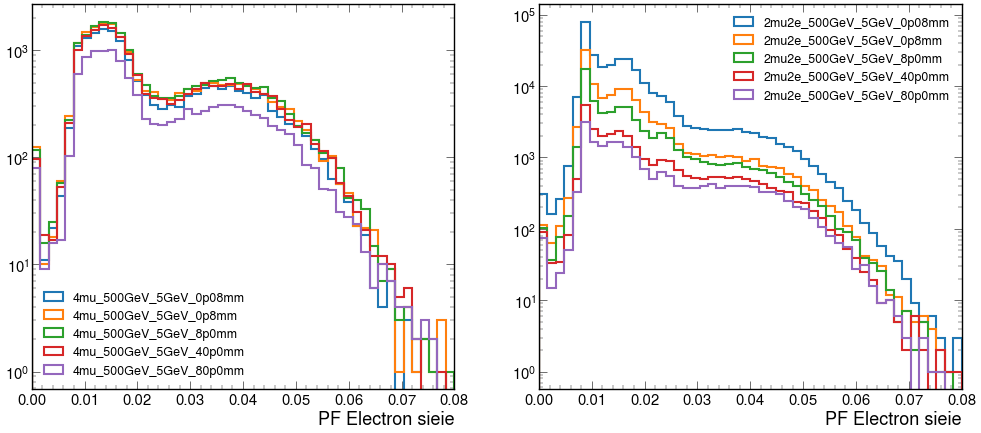

In [34]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("sieie", events_4mu[i_4mu].sieie, events_2mu2e[i_2mu].sieie)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].sieie), range=(0,0.08), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,0.08)
ax[1].set_xlim(0,0.08)
ax[0].set_xlabel('PF Electron sieie')
ax[1].set_xlabel('PF Electron sieie')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/sieie.png", bbox_inches="tight")

## r9

4mu r9 structure: [[], [], [], [], [], [], [], [], [], ... [0.941], [], [], [], [], [], [], [0.998]]
2mu2e r9 structure: [[0.979, 0.976], [0.961, 1.08], [0.86], ... [0.971, 0.916], [0.652], [0.939]]
4mu r9 structure: [[1.02], [], [], [], [], [], [], [], [], ... [], [], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.771, 0.852], [0.952, 0.557], [0.965, ... 0.874], [0.923], [0.893, 0.683, 0.836]]
4mu r9 structure: [[], [], [], [], [], [], [], [0.496], [], ... [], [], [], [], [], [], [], [0.888]]
2mu2e r9 structure: [[], [0.506], [0.585], [], [0.942, 0.658], ... [], [3.4], [], [1.04], [], [0.813]]
4mu r9 structure: [[], [], [], [], [], [], [], [], [], [], ... [], [1.06], [], [], [], [], [], [], []]
2mu2e r9 structure: [[0.639], [], [0.805], [], [], [], [], ... [0.952], [], [], [0.973], [], [0.884]]
4mu r9 structure: [[], [], [], [0.649], [], [], [], [], [], ... [], [], [0.923], [], [], [], [], []]
2mu2e r9 structure: [[], [], [], [], [], [], [], [0.853], ... [], [0.639], [], [0.862],

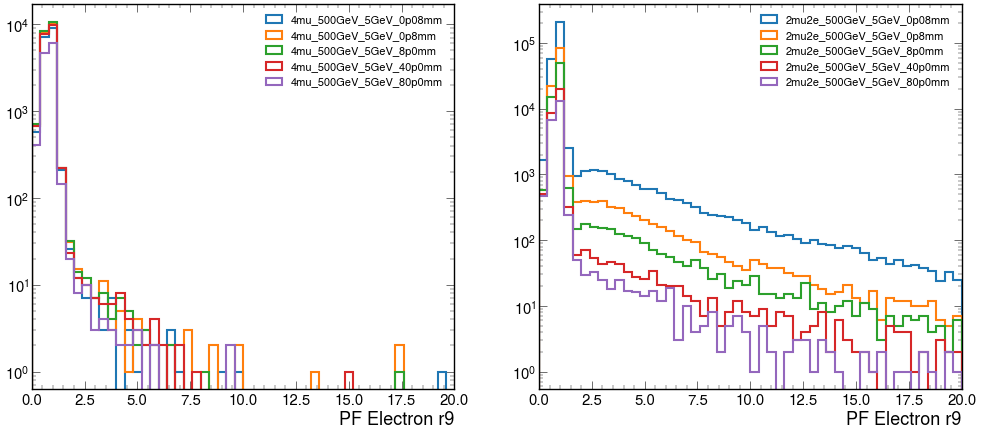

In [36]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("r9", events_4mu[i_4mu].r9, events_2mu2e[i_2mu].r9)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].r9), range=(0,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].r9), range=(0,20), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
ax[0].set_xlim(0,20)
ax[1].set_xlim(0,20)
ax[0].set_xlabel('PF Electron r9')
ax[1].set_xlabel('PF Electron r9')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_ELECTRON/Basic/r9.png", bbox_inches="tight")